# Titanic Spaceship
<img src="./data/titanic.png" style="display:block; position:reative; margin-left:auto; margin-right:auto;width:50%"></img>
### Context
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using recordf recovered from the spaceship’s damaged computer system.

Help save them and change history!

## 1. Introduction 
### Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### Discovering the files 
In the data folder we do have 3 files containing interessting pieces of information : 
- sample_submission.csv : Contains the good format for submitting your resultss
- train.csv : It contains the data we will use to train our predictive model -> optimizing the parameters and hyperparameters
- test.csv : This will contains the data to try out the weights we optimized during the training part with the training data which is just above

So let's checkout the kind of data we have in train which should be kinda identical to what we have in test

In [51]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [52]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Details of the datasets
- PassengerId : unique key for the passenger
- HomePlanet : qualitative data(class) 
- CryoSleep : qualitative data(class binary because boolean)
- Cabin : qualitative data but not row(contains 3 pieces of information so we will have to split it)
    - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination : qualitative data
- Age : Quantitative data but aybe we can translate it to class using range of ages (baby,young,teenagers,adult,old)
- Vip : Qualitative data (boolean so binary)
- RoomService

## 2. Cleaning
### Lets check and replace the missing values 
- If we can find an alternative 
- Otherwise I'll drop the rows

In [53]:
nan_values = train_df[train_df.isna().any(axis=1)] 
print(f"Rows with missing values : {nan_values}")

Rows with missing values :      PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
7        0006_02      Earth      True     G/0/S  TRAPPIST-1e  28.0  False   
10       0008_02     Europa      True     B/1/P  TRAPPIST-1e  34.0  False   
15       0012_01      Earth     False       NaN  TRAPPIST-1e  31.0  False   
16       0014_01       Mars     False     F/3/P  55 Cancri e  27.0  False   
23       0020_03      Earth      True     E/0/S  55 Cancri e  29.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
8667     9250_01     Europa     False   E/597/P  TRAPPIST-1e  29.0  False   
8674     9257_01        NaN     False  F/1892/P  TRAPPIST-1e  13.0  False   
8675     9259_01      Earth       NaN  F/1893/P  TRAPPIST-1e  44.0  False   
8684     9274_01        NaN      True  G/1508/P  TRAPPIST-1e  23.0  False   
8687     9275_03     Europa       NaN    A/97/P  TRAPPIST-1e  30.0  False   

      RoomService  FoodCourt  ShoppingMall   Spa

We  can replace the age per the mean values of our series age

In [54]:
def replaceAgeWithMeanVal(df):
    print(f"Size of the base dataset : {df.shape}")
    print(f"Rows where the age is missing : {df['Age'].isna().sum()}")
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    print(f"Check if we replaces all the rows with missing age(should be egal to 0) : {df['Age'].isna().sum()}\n\n")

print("Train dataset :")
replaceAgeWithMeanVal(train_df)

print("Test dataset :")
replaceAgeWithMeanVal(test_df)

Train dataset :
Size of the base dataset : (8693, 14)
Rows where the age is missing : 179
Check if we replaces all the rows with missing age(should be egal to 0) : 0


Test dataset :
Size of the base dataset : (4277, 13)
Rows where the age is missing : 91
Check if we replaces all the rows with missing age(should be egal to 0) : 0




Here is the money people spent on services so let's consider that na = no expenses

In [55]:
def replaceNaWithZero(df):
    df['ShoppingMall'].fillna(0, inplace=True)
    df['Spa'].fillna(0, inplace=True)
    df['VRDeck'].fillna(0, inplace=True)
    df['FoodCourt'].fillna(0, inplace=True)
    df['RoomService'].fillna(0, inplace=True)

replaceNaWithZero(train_df)
replaceNaWithZero(test_df)

print(f"Train: Rows with missing values : {train_df.isna().any(axis=1).sum()}")
print(f"Test: Rows with missing values : {test_df.isna().any(axis=1).sum()}")



Train: Rows with missing values : 1134
Test: Rows with missing values : 530


### Deletion of the remaining rows containing NA

Before deletion SHAPE :
- train : 8693
- test : 4277
Before deletion NAs :
- train : 1134
- test : 530
After deletion SHAPE :
- train : 7559
- test : 3747
After deletion NAs :
- train : 0
- test : 0


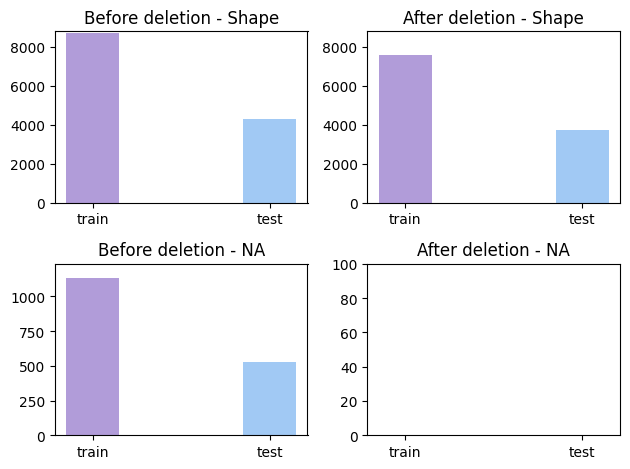

In [56]:
# Display of the shapes and nas states before vs after deletion

#Creation of array to plot the results
before_deletion_shape = [train_df.shape[0], test_df.shape[0]]
before_deletion_na = [train_df.isna().any(axis=1).sum(), test_df.isna().any(axis=1).sum()]
after_deletion_shape = []
after_deletion_na = []


print(f"Before deletion SHAPE :\n- train : {train_df.shape[0]}\n- test : {test_df.shape[0]}")
print(f"Before deletion NAs :\n- train : {train_df.isna().any(axis=1).sum()}\n- test : {test_df.isna().any(axis=1).sum()}")

# Deletion of the rows with missing values
train_df.dropna(axis=0, inplace=True)
test_df.dropna(axis=0, inplace=True)

after_deletion_shape.append(train_df.shape[0])
after_deletion_shape.append(test_df.shape[0])

after_deletion_na.append(train_df.isna().any(axis=1).sum())
after_deletion_na.append(test_df.isna().any(axis=1).sum())

print(f"After deletion SHAPE :\n- train : {train_df.shape[0]}\n- test : {test_df.shape[0]}")
print(f"After deletion NAs :\n- train : {train_df.isna().any(axis=1).sum()}\n- test : {test_df.isna().any(axis=1).sum()}")

# Plotting part
fig, axs = plt.subplots(2, 2)

axs[0, 0].bar(["train", "test"], before_deletion_shape,width=0.3, color=['#b19cd9', '#a1c9f4'])
axs[0, 0].set_title('Before deletion - Shape')
axs[0, 0].set_ylim([0, max(before_deletion_shape) + 100])

axs[0, 1].bar(["train", "test"], after_deletion_shape,width=0.3, color=['#b19cd9', '#a1c9f4'])
axs[0, 1].set_title('After deletion - Shape')
axs[0, 1].set_ylim([0, max(before_deletion_shape) + 100])

axs[1, 0].bar(["train", "test"], before_deletion_na,width=0.3, color=['#b19cd9', '#a1c9f4'])
axs[1, 0].set_title('Before deletion - NA')
axs[1, 0].set_ylim([0, max(before_deletion_na) + 100])

axs[1, 1].bar(["train", "test"], after_deletion_na,width=0.3, color=['#b19cd9', '#a1c9f4'])
axs[1, 1].set_title('After deletion - NA')
axs[1, 1].set_ylim([0, max(after_deletion_na) + 100])


fig.tight_layout()
plt.show()

### Transform Cabin Number in 3 columns : 
- Deck
- Num
- Side

In [57]:
# split cabin column in 3 columns (split the string ('/') 
# and create a column for each part of the string)
def splitCabin(df):
    df[['Deck','Num','Side']] = df['Cabin'].str.split('/', expand=True)
    df.drop(columns=['Cabin'], inplace=True)

splitCabin(test_df)
splitCabin(train_df)



print(f"Columns of the dataset = \n{test_df.columns}")

Columns of the dataset = 
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Deck', 'Num', 'Side'],
      dtype='object')


### Spliting our datasets 
- To let the model predict an output we have to train it and in order that we will have to split our datasets in 2 part
    - X : This is every features of the dataset that will help us knowing if the passenger survived 
    - y : In our case that's the result so the transported column

We will then try our model on the test dataset that's why we don't have the column "Transported" inside test.csv

In [58]:
X_train, y_train = train_df.drop(columns=['Transported']), train_df['Transported']

print(f"X_train shape = {X_train.shape}")
print(f"Y_train shape = {y_train.shape}")



X_train shape = (7559, 15)
Y_train shape = (7559,)


### Done ! 
- We are now done with the cleaning and data preprocessing part 
- I tried to make it the more logic possible without taking too much time 
- Hope you understood the process and why I did all that

## 3. Processing 
Now that we have our data we just have to chose the perfect model for this case. The problem here is a binary classification problem cause the result is a class and there is only 2 outputs possible : transported or not 
- We can try many models 
    - Logicistic regression
    - Naive Bayes
    - KNN
    - Decision Trees/Random Forest
    - Support Vector Machine 
    - Neural networks 